# LLamaIndex- Quickstart Guide

## Installation

In [3]:
!pip install llama-index sentence-transformers openai

## Workflow for LLamaIndex

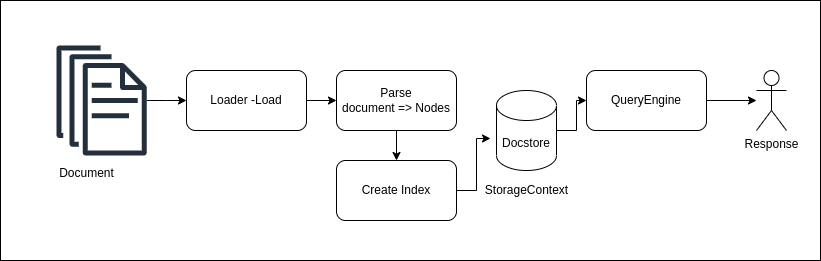

### Workflow Image Credits: [AI Planet](https://aiplanet.com)

## Load the data

In [4]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader

Create a new folder with `data` or any name. Once you create a new data folder, insde that add your .txt data. You can also add different dataloaders. Refer: [Connector](https://gpt-index.readthedocs.io/en/latest/core_modules/data_modules/connector/root.html)

This will load in documents through load_data function.

The folder should look like:

* data
    * my_data.txt

Note:
- There are two approaches here to proceed:
  - 1) OpenAI - using OpenAI API Key
  - 2) LLamaCPP - using llama2-13-chat model

If you declare OpenAI key, then it will use the GPT model, if not specified by default it will use llama2-13-chat

In [5]:
import os
from getpass import getpass

os.environ['OPENAI_API_KEY'] = getpass()

··········


We are using OPENAPI_API since it is fast. In absence of API_KEY use the default llama2 model. If you are running Llama model, do change the runtime to GPU

In [8]:
documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents)

### This is what our data looks like:

In [9]:
print(documents[0].text)

The history of Artificial Intelligence (AI) is a fascinating journey that spans several decades and is marked by significant milestones, breakthroughs, and shifts in paradigms. This history can be divided into several key phases:

1. **Early Roots (Antiquity to 1940s)**:
   - The concept of creating artificial beings with human-like intelligence dates back to ancient myths and legends, such as the story of Pygmalion and Galatea in Greek mythology.
   - Mathematician and logician George Boole's work on symbolic logic in the mid-19th century laid the groundwork for AI's logical foundations.
   - Alan Turing's 1936 paper, "On Computable Numbers," introduced the idea of a theoretical machine that could simulate any human's thought processes, known as the Turing Machine. This paper is considered a pivotal moment in AI's intellectual history.

2. **Early Computers and the Dartmouth Workshop (1940s-1950s)**:
   - The development of digital computers during World War II and the post-war years 

A Document represents a lightweight container around the data source. You can now choose to proceed with one of the following steps:

- Approach-1: First convert the Document into Node objects
- Approach-2: Feed the Document object directly into the index

# Parser

In [10]:
from llama_index.node_parser import SimpleNodeParser

Node parsers are a simple abstraction that take a list of documents, and chunk them into Node objects, such that each node is a specific size. When a document is broken into nodes, all of it’s attributes are inherited to the children nodes (i.e. metadata, text and metadata templates, etc.).



In [11]:
parser = SimpleNodeParser.from_defaults()
nodes = parser.get_nodes_from_documents(documents)

In [12]:
nodes[0]

TextNode(id_='ed512fe1-3da6-408a-8485-3408322cb4c4', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='c7c35a3f-3546-4ae1-a69f-fe4888fd3935', node_type=None, metadata={}, hash='a479e67ff0032868ab2ffa984b0f79656f32cc57056a7587b45559faf5c74cab')}, hash='a479e67ff0032868ab2ffa984b0f79656f32cc57056a7587b45559faf5c74cab', text='The history of Artificial Intelligence (AI) is a fascinating journey that spans several decades and is marked by significant milestones, breakthroughs, and shifts in paradigms. This history can be divided into several key phases:\n\n1. **Early Roots (Antiquity to 1940s)**:\n   - The concept of creating artificial beings with human-like intelligence dates back to ancient myths and legends, such as the story of Pygmalion and Galatea in Greek mythology.\n   - Mathematician and logician George Boole\'s work on symbolic logic in the mid-19th century laid the 

# Index

Vector Store Index:

LlamaIndex also supports different vector stores as the storage backend for GPTVectorStoreIndex or VectorStoreIndex.

This will creare embeddings for each node and store it in a Vector Store

> Also remember: GPTVectorStoreIndex, by default, LlamaIndex will use OpenAI to create the embedding.


![vectorstoreindex](https://gpt-index.readthedocs.io/en/v0.6.8/_images/vector_store.png)


### Must Read: [How Each Index Works?](https://gpt-index.readthedocs.io/en/v0.6.8/guides/primer/index_guide.html)

In [13]:
from llama_index import VectorStoreIndex

In [14]:
index = VectorStoreIndex(nodes)

In [15]:
index

# Query Engine

Query engine is a generic interface that allows you to ask question over your data.

A query engine takes in a natural language query, and returns a rich response. It is most often (but not always) built on one or many Indices via Retrievers. You can compose multiple query engines to achieve more advanced capability.

In [16]:
query_engine = index.as_query_engine()

In [17]:
response = query_engine.query("In what year was Expert Systems and Knowledge Representation found?")

In [18]:
print(response)

Expert Systems and Knowledge Representation were found in the 1980s.
